COMP 352 Final Project

Authors: Sharanbir Mander, Jorge Rodriguez, Rakaan Alrasheed,   Olivia Shafer

Date: 5/21/2024

S&P500 Price Rise and Fall Prediction

Dataset: imported with yfinance 



Table of Contents:

Data importing anf Pre-Processing
Data Analysis and Visualization
Data Analytics 

In [1]:
# Importing the yfinance library to fetch financial data from Yahoo Finance
# Importing matplotlib for plotting and visualizing the data
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Creating a Ticker object for the S&P 500 index using respecive ticker symbols
sp500 = yf.Ticker("^GSPC")

In [3]:
# Fetching the historical data for the S&P 500 index and Apple Inc. for the maximum available period
sp500 = sp500.history(period="max")

In [45]:
sp500.shape

(7661, 17)

In [46]:
cat_count = 0
for dtype in sp500.dtypes:
    if dtype == "object":
        cat_count = cat_count + 1

In [48]:
print("# of categorical variables:", cat_count)

numeric_vars = sp500.shape[1] - cat_count - 1
print(
    "# of continuous variables:", numeric_vars
)  # subtract and extra column as 1 column is an ID column

# of categorical variables: 0
# of continuous variables: 16


In [49]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [4]:
# Displaying the data of S&P 500
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,0.0,0.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,0.0,0.0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,0.0,0.0


In [50]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')

In [5]:
# Accessing the index of the S&P 500 historical data, which contains the dates for the data points
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-07 00:00:00-04:00', '2024-05-08 00:00:00-04:00',
               '2024-05-09 00:00:00-04:00', '2024-05-10 00:00:00-04:00',
               '2024-05-13 00:00:00-04:00', '2024-05-14 00:00:00-04:00',
               '2024-05-15 00:00:00-04:00', '2024-05-16 00:00:00-04:00',
               '2024-05-17 00:00:00-04:00', '2024-05-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24212, freq=None)

In [52]:
# Remove spaces from column names
sp500.columns = [col.replace(" ", "") for col in sp500.columns]

In [53]:
# missing data
total = sp500.isnull().sum().sort_values(ascending=False)
percent = (sp500.isnull().sum() / sp500.isnull().count()).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
Open,0,0.0
Close_Ratio_5,0,0.0
Close_Ratio_1000,0,0.0
Trend_250,0,0.0
Close_Ratio_250,0,0.0
Trend_60,0,0.0
Close_Ratio_60,0,0.0
Trend_5,0,0.0
Trend_2,0,0.0
High,0,0.0


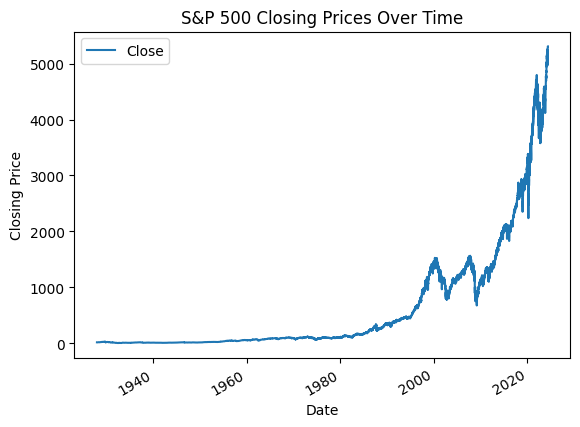

In [6]:
# Plot S&P 500 data
sp500.plot.line(y="Close", use_index=True)
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [7]:
# Removing the 'Dividends' & 'Stock Splits' column from the S&P 500 historical data as it is not needed
# removed divedends and stock splits  because they are useful for individual stocks not an index fund
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
# Creating a new column 'Tomorrow' in the S&P 500 historical data by shifting the 'Close' prices one day back
# Directionality of the stock price is more important than the absolute price value
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020


In [9]:
# Creating a new column 'Target' in the S&P 500 historical data
# The 'Target' column is 1 if the 'Tomorrow' price is higher than the 'Close' price, otherwise 0
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020,1


In [10]:
# Filtering the S&P 500 historical data to include only data from January 1, 1990, onwards
# Creating a copy of this filtered data to avoid modifying the original DataFrame
# TODO remove timestamp
#
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020,1


The correlation matrix is highly correlated, it gets better after feature engineering shown towards the end of the notebook.

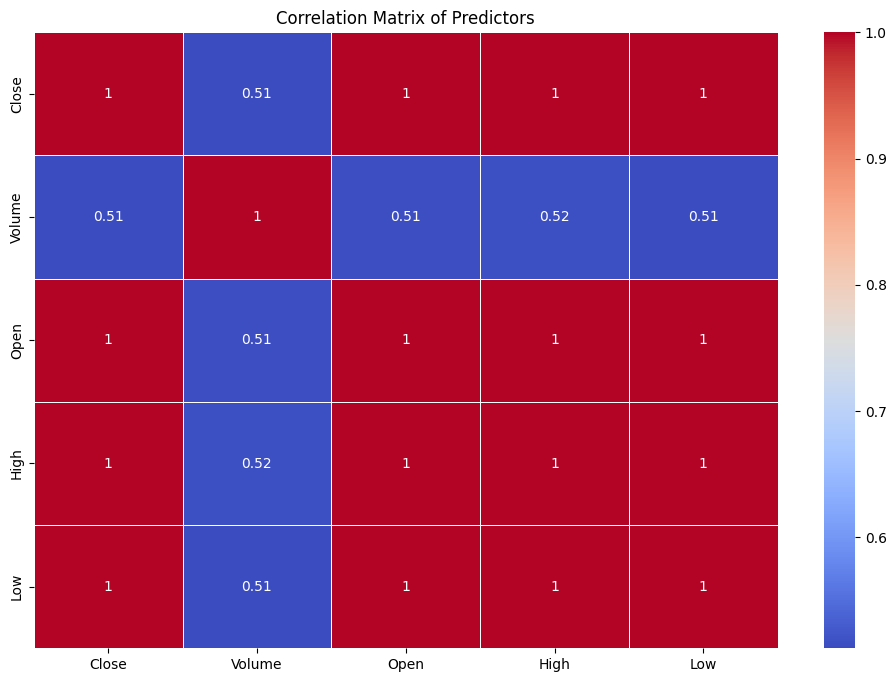

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = sp500[predictors].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Predictors')
plt.show()

In [42]:
# Importing the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initializing the RandomForestClassifier with specified hyperparameters
# n_estimators=250: Number of trees in the forest
# min_samples_split=100: Minimum number of samples required to split an internal node
# random_state=1: Setting the random seed for reproducibility
# RandomForestModel can pick up on non linear relationships
# Changed number of decision trees to gain better accuracy
# Setting min sample split helps avoid overfitting
# Random state = 1, keeps the seed value 1 ensuring same results when rerunning the model
model = RandomForestClassifier(n_estimators=250, min_samples_split=100, random_state=1)

# Splitting the S&P 500 data into training and testing sets
# The training set consists of all data except the last 100 rows
# The testing set consists of the last 100 rows
train = sp500.iloc[:-200]
test = sp500.iloc[-200:]

# ^ Simple baseline model

print(train["Target"].value_counts())
print(test["Target"])


# Defining the list of predictor variables to be used for training the model
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fitting the RandomForestClassifier model on the training data
# Using the predictors to predict the 'Target' variable
model.fit(train[predictors], train["Target"])


Target
1    4010
0    3451
Name: count, dtype: int64
Date
2023-08-03 00:00:00-04:00    0
2023-08-04 00:00:00-04:00    1
2023-08-07 00:00:00-04:00    0
2023-08-08 00:00:00-04:00    0
2023-08-09 00:00:00-04:00    1
                            ..
2024-05-13 00:00:00-04:00    1
2024-05-14 00:00:00-04:00    1
2024-05-15 00:00:00-04:00    0
2024-05-16 00:00:00-04:00    1
2024-05-17 00:00:00-04:00    1
Name: Target, Length: 200, dtype: int64


RandomForestClassifier(min_samples_split=100, n_estimators=250, random_state=1)

In [12]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [13]:
preds = pd.Series(preds, index=test.index)
# precision_score(test["Target"], preds)
preds

Date
2023-08-04 00:00:00-04:00    1
2023-08-07 00:00:00-04:00    1
2023-08-08 00:00:00-04:00    1
2023-08-09 00:00:00-04:00    1
2023-08-10 00:00:00-04:00    1
                            ..
2024-05-14 00:00:00-04:00    0
2024-05-15 00:00:00-04:00    0
2024-05-16 00:00:00-04:00    0
2024-05-17 00:00:00-04:00    0
2024-05-20 00:00:00-04:00    0
Length: 200, dtype: int64

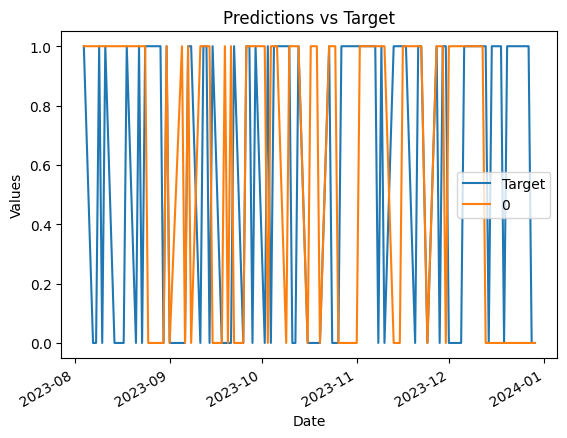

In [14]:
#TEST
combined = pd.concat([test["Target"], preds], axis=1)

start_date = "2023-05-01"
end_date = "2024-01-01"
filtered_combined = combined.loc[start_date:end_date]

# Plot the filtered DataFrame
filtered_combined.plot()
plt.title('Predictions vs Target')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

In [15]:
precision_score(test["Target"], preds)

0.5230769230769231

<Axes: xlabel='Date'>

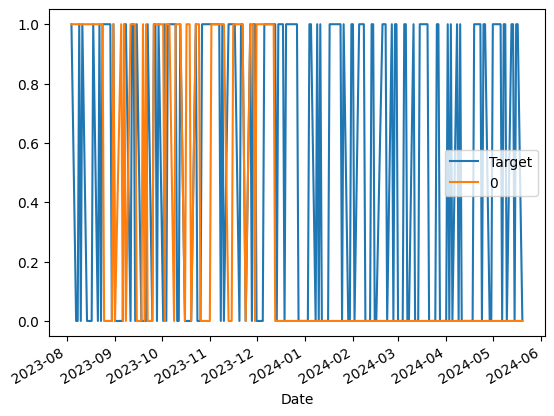

In [16]:
# TODO shorten dates
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [17]:
# So we are currently testing against the last 200 days
# We want to test across multiple years to enhance real world predictability
# Predict function is part of the backtesting capability
# this function fits, trains, and combines the results
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [18]:
# Each year has ~250 trading days, we are using 10 years worth of data
# Starts with 10 years of data to predict values for the 11th year and so on...

def backtest(data, model, predictors, start=2500, step=250):
    all_preddictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        predictions = predict(train, test, predictors, model)
        all_preddictions.append(predictions)
    return pd.concat(all_preddictions)

In [19]:
predictions = backtest(sp500, model, predictors)

In [20]:
predictions["Predictions"].value_counts()

Predictions
0    4596
1     404
Name: count, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5445544554455446

In [22]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.555
0    0.445
Name: count, dtype: float64

In [23]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1,1.002413,1.0,1.005399,3.0,1.022066,31.0,1.127019,140.0,1.259524,531.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0,1.005824,2.0,1.012503,4.0,1.032924,32.0,1.139098,140.0,1.273572,531.0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020,1,0.998958,1.0,1.007205,3.0,1.029721,31.0,1.135656,139.0,1.270232,530.0


In [25]:
sp500 = sp500.dropna()

In [26]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176,1,0.999879,1.0,1.002825,3.0,1.017942,30.0,1.122690,139.0,1.254150,531.0
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1,1.002413,1.0,1.005399,3.0,1.022066,31.0,1.127019,140.0,1.259524,531.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0,1.005824,2.0,1.012503,4.0,1.032924,32.0,1.139098,140.0,1.273572,531.0


In [27]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=50, random_state=1)

In [28]:
# Lets modify our predict function 
# We are using predict_proba function to get probablity if the stock
# is going up tomorrow or not
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    # we want the model to be a bit more confident this time
    # By default its 50%, we set it to 65% which will reduce the 
    # number of # of trading days but it will increase the chance 
    # that it will go up
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [29]:
def predict(train, test, predictors, model):
    # Ensure that the predictors exist in the train DataFrame
    missing_predictors_train = [col for col in predictors if col not in train.columns]
    if missing_predictors_train:
        print(f"Missing predictors in train data: {missing_predictors_train}")
        raise KeyError(f"Missing predictors in train data: {missing_predictors_train}")

    # Ensure that the predictors exist in the test DataFrame
    missing_predictors_test = [col for col in predictors if col not in test.columns]
    if missing_predictors_test:
        print(f"Missing predictors in test data: {missing_predictors_test}")
        raise KeyError(f"Missing predictors in test data: {missing_predictors_test}")

    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]

    # Adjust the prediction threshold
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [30]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()  # Create the test DataFrame for the current step
        
        if test.empty:
            continue  # Skip if test data is empty
        
        # Print the columns of train and test to debug
        print(f"Train columns: {train.columns}")
        print(f"Test columns: {test.columns}")

        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)


In [31]:
predictions = backtest(sp500, model, new_predictors)

Train columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Test columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Train columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Test columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       

In [32]:
predictions["Predictions"].value_counts()

Predictions
0.0    4398
1.0     763
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5661861074705111

In [34]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import precision_score

# Define the predict function as before
def predict(train, test, predictors, model):
    # Ensure that the predictors exist in the train DataFrame
    missing_predictors_train = [col for col in predictors if col not in train.columns]
    if missing_predictors_train:
        print(f"Missing predictors in train data: {missing_predictors_train}")
        raise KeyError(f"Missing predictors in train data: {missing_predictors_train}")

    # Ensure that the predictors exist in the test DataFrame
    missing_predictors_test = [col for col in predictors if col not in test.columns]
    if missing_predictors_test:
        print(f"Missing predictors in test data: {missing_predictors_test}")
        raise KeyError(f"Missing predictors in test data: {missing_predictors_test}")

    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]

    # Adjust the prediction threshold
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Update the backtest function to use TimeSeriesSplit
def backtest(data, model, predictors, n_splits=10):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    all_predictions = []

    for train_index, test_index in tscv.split(data):
        train = data.iloc[train_index].copy()
        test = data.iloc[test_index].copy()

        if test.empty:
            continue  # Skip if test data is empty

        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

# Assume sp500, model, and new_predictors are already defined
predictions = backtest(sp500, model, new_predictors, n_splits=10)

# Evaluate the results
print(predictions["Predictions"].value_counts())
print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")


Predictions
0.0    5420
1.0    1540
Name: count, dtype: int64
Precision Score: 0.5363636363636364


In [35]:
# XGBoost: An optimized implementation of gradient boosting designed for speed
#  and performance.
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=1)

predictions = backtest(sp500, model, new_predictors, n_splits=10)
print(predictions["Predictions"].value_counts())
print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")


Predictions
0.0    4123
1.0    2837
Name: count, dtype: int64
Precision Score: 0.5435318998942545


In [36]:
# Support Vector Machines (SVMs) can be used for classification tasks and are effective
#  in high-dimensional spaces.
from sklearn.svm import SVC

model = SVC(probability=True, kernel='rbf', C=1, gamma='auto', random_state=1)

predictions = backtest(sp500, model, new_predictors, n_splits=10)
print(predictions["Predictions"].value_counts())
print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")


Predictions
0.0    6931
1.0      29
Name: count, dtype: int64
Precision Score: 0.5172413793103449


In [37]:
# Neural Networks, particularly Recurrent Neural Networks (RNNs) 
# and Long Short-Term Memory (LSTM) networks, are well-suited for 
# time series data due to their ability to capture temporal dependencies.
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500, random_state=1)

predictions = backtest(sp500, model, new_predictors, n_splits=10)
print(predictions["Predictions"].value_counts())
print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")


Predictions
1.0    6198
0.0     762
Name: count, dtype: int64
Precision Score: 0.5387221684414327


In [38]:
# K-Nearest Neighbors (KNN) can be used for classification by looking at the 
# 'k' nearest data points and making predictions based on the majority class.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

predictions = backtest(sp500, model, new_predictors, n_splits=10)
print(predictions["Predictions"].value_counts())
print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")


Predictions
1.0    4131
0.0    2829
Name: count, dtype: int64
Precision Score: 0.5323166303558461


In [39]:
# Logistic Regression is a simple yet effective model 
# for binary classification problems.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=1)

predictions = backtest(sp500, model, new_predictors, n_splits=10)
print(predictions["Predictions"].value_counts())
print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")


Predictions
0.0    6382
1.0     578
Name: count, dtype: int64
Precision Score: 0.5259515570934256


In [40]:
# Ensemble methods like Voting Classifier can combine multiple
# models to improve performance.
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model1 = LogisticRegression(max_iter=1000, random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model3 = SVC(probability=True, random_state=1)

ensemble_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='soft')

predictions = backtest(sp500, ensemble_model, new_predictors, n_splits=10)
print(predictions["Predictions"].value_counts())
print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")


Predictions
1.0    3757
0.0    3203
Name: count, dtype: int64
Precision Score: 0.5352675006654245


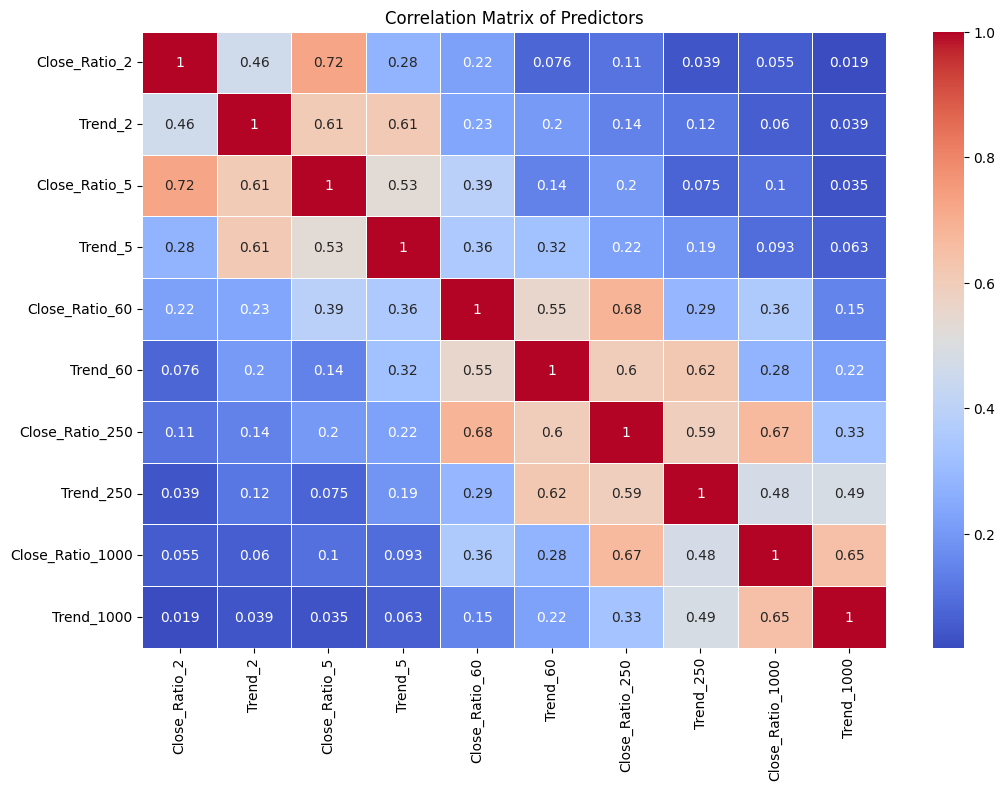

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = sp500[new_predictors].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Predictors')
plt.show()